In [1]:
import openadmet_models
import json
import pandas as pd

In [2]:
path_to_data = "../../../CYP3A4_anvil_runs/"
folders = ['CYP3A4_cross_val', 'CYP3A4_descr_cross_val', 'CYP3A4_fp_cross_val']

df_combined = pd.read_json(f'{path_to_data}CYP3A4_cross_val/anvil_run/cross_validation_metrics.json')
df_combined['method'] = 'combined'

df_fp = pd.read_json(f'{path_to_data}CYP3A4_fp_cross_val/anvil_run/cross_validation_metrics.json')
df_fp['method'] = 'fingerprint'

df_descr = pd.read_json(f'{path_to_data}CYP3A4_descr_cross_val/anvil_run/cross_validation_metrics.json')
df_descr['method'] = 'descriptor'

dfs_all = pd.concat([df_combined, df_fp, df_descr])

metrics = ['mse', 'mae', 'r2', 'ktau', 'spearmanr']

dfs_all


,fit_time,score_time,mse,mae,r2,ktau,spearmanr,method
value,"[8.363051652908325, 8.358070850372314, 8.34479...","[0.007022619247436, 0.006872415542602, 0.00689...","[0.24799016371235302, 0.25457140427247504, 0.2...","[0.351902953100096, 0.360321865188574, 0.35778...","[0.44836298585821605, 0.44269081341290806, 0.4...","[0.43569857339740403, 0.42893376024379803, 0.4...","[0.5938092523575681, 0.586768310243939, 0.5923...",combined
mean,8.240763,0.00696,0.243859,0.353968,0.438767,0.427919,0.585584,combined
lower_ci,8.088575,0.006405,0.221208,0.342392,0.392981,0.402789,0.554131,combined
upper_ci,8.392952,0.007515,0.266511,0.365545,0.484552,0.453049,0.617037,combined
confidence_level,0.95,0.95,0.95,0.95,0.95,0.95,0.95,combined
value,"[0.673635721206665, 0.652476072311401, 0.65868...","[0.006034851074218001, 0.006004571914672001, 0...","[0.24857606142622501, 0.25596997611703504, 0.2...","[0.361403437152476, 0.362273105177354, 0.36228...","[0.44705969680580004, 0.43962905186391205, 0.4...","[0.40554759653126105, 0.41113342527883, 0.4161...","[0.558356543135876, 0.5671109042704661, 0.5735...",fingerprint
mean,0.675274,0.00612,0.247713,0.361972,0.429747,0.402729,0.555669,fingerprint
lower_ci,0.633592,0.005506,0.227272,0.35047,0.382191,0.379026,0.524464,fingerprint
upper_ci,0.716955,0.006734,0.268154,0.373474,0.477303,0.426431,0.586873,fingerprint
confidence_level,0.95,0.95,0.95,0.95,0.95,0.95,0.95,fingerprint


In [3]:
### LEVENE TEST ###
from scipy.stats import levene
for m in metrics:
    print(f'{m}: ' + str(levene(df_combined[m].value, df_fp[m].value, df_descr[m].value)))

mse: LeveneResult(statistic=0.2963738998768453, pvalue=0.7444120332219919)
mae: LeveneResult(statistic=0.3913559828714932, pvalue=0.6775688826791365)
r2: LeveneResult(statistic=0.3381967830040038, pvalue=0.7141815393578078)
ktau: LeveneResult(statistic=0.05033310952264555, pvalue=0.9509460423298629)
spearmanr: LeveneResult(statistic=0.23161805161450738, pvalue=0.7938377878544016)


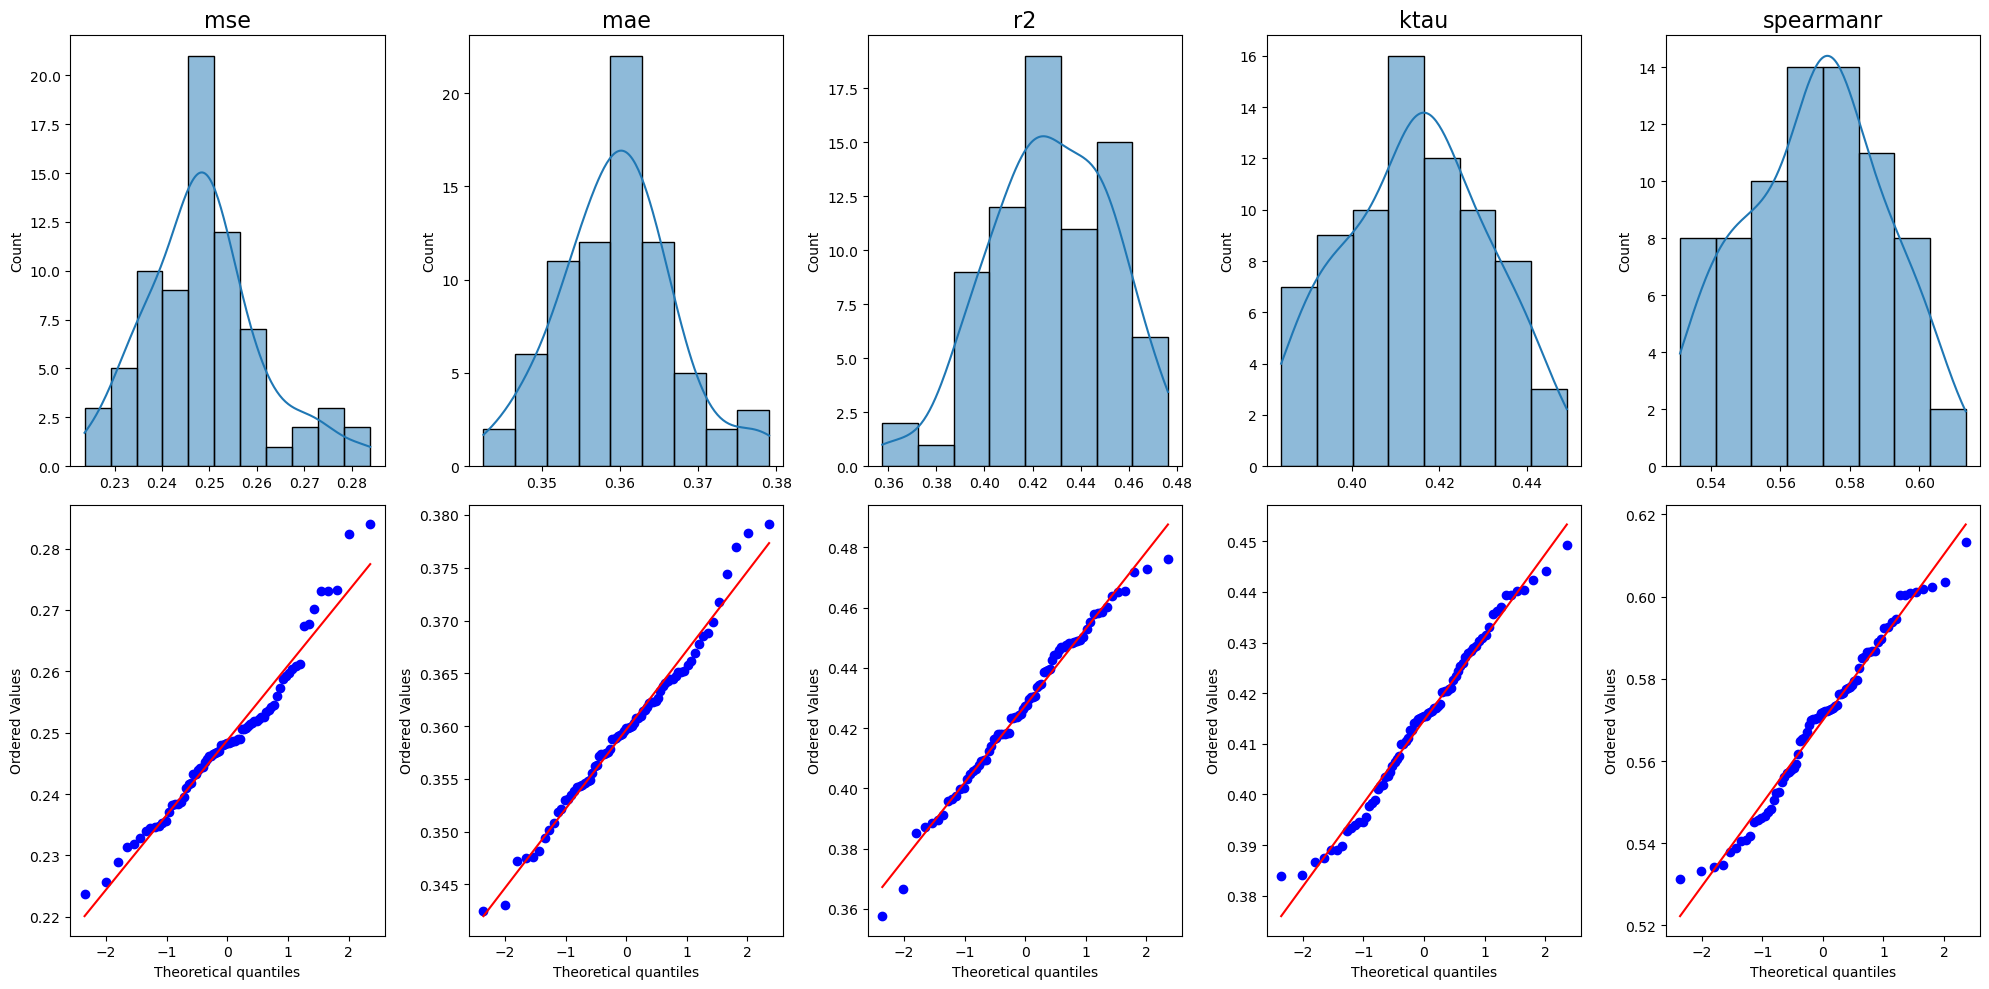

In [8]:
### NORMALITY TEST ###
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import itertools

fig, axes = plt.subplots(2, len(metrics), figsize=(20, 10))

for i, metric in enumerate(metrics):
    ax = axes[0, i]
    vals = []
    for i in dfs_all[metric].value:
        for n in i:
            vals.append(n)
    sns.histplot(vals, kde=True, ax=ax)
    ax.set_title(f'{metric}', fontsize=16)

for i, metric in enumerate(metrics):
    ax = axes[1, i]
    vals = []
    for i in dfs_all[metric].value:
        for n in i:
            vals.append(n)
    stats.probplot(vals, dist="norm", plot=ax)
    ax.set_title("")

plt.tight_layout()


In [11]:
### ANOVA ###
from scipy.stats import f_oneway

for i, stat in enumerate(metrics):
    model = f_oneway(df_combined[stat].value, df_fp[stat].value, df_descr[stat].value)
    # p_value = model.anova_table['Pr > F'].iloc[0]
    ax = sns.boxplot(y=stat, x="method", hue="method", ax=axes[i], data=dfs_all, palette="Set2", legend=False)
    title = stat.upper()
    # ax.set_title(f"p={p_value:.1e}")
    ax.set_xlabel("")
    ax.set_ylabel(title)
    x_tick_labels = ax.get_xticklabels()
    label_text_list = [x.get_text() for x in x_tick_labels]
    new_xtick_labels = ["\n".join(x.split("_")) for x in label_text_list]
    ax.set_xticks(list(range(0, len(x_tick_labels))))
    ax.set_xticklabels(new_xtick_labels)
plt.tight_layout()

AttributeError: 'numpy.ndarray' object has no attribute 'yaxis'